In [1]:
!pip install python-doctr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 43.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=4f5f81d20e5ef749e6aaeff68830673cc9083bb34cd0ba86e

In [2]:
# !sudo apt install libcairo2-dev pkg-config

In [4]:
!pip install tf2onnx


## Doctr-OCR

In [5]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

2024-03-02 06:05:58.258269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 06:05:58.258361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 06:05:58.382800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


  0%|          | 0/94122142 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [6]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_images("/kaggle/input/imagessss/Screenshot (1).png")
# Analyze
result = model(doc)

## Result

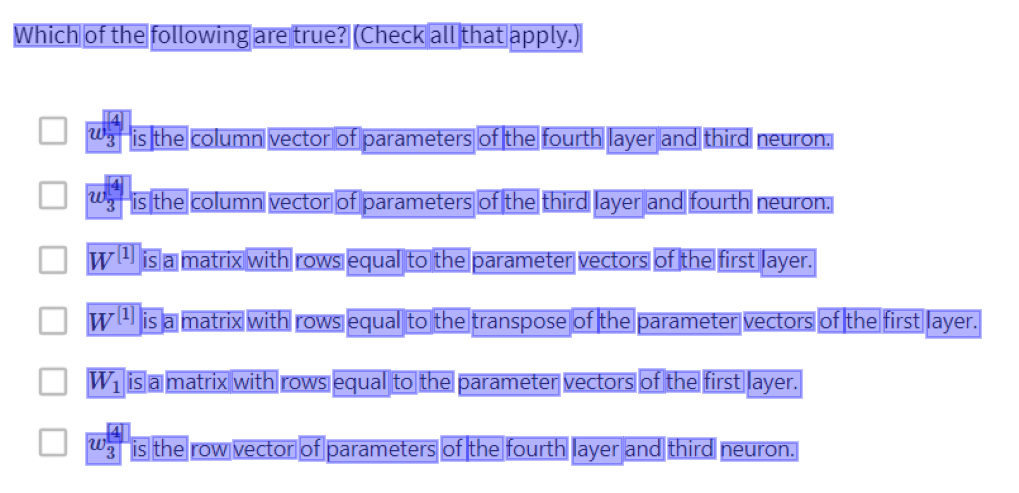

In [7]:
result.show()

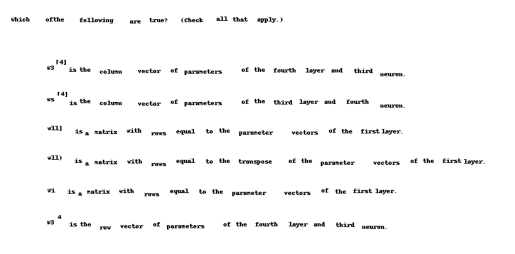

In [8]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0])
plt.axis('off')
plt.show()

In [9]:
text=result.render()

In [10]:
print(text)

Which ofthe following are true? (Check all that apply.)

[4]

W3 is the column vector of parameters of the fourth layer and third neuron.

[4]

ws is the column vector of parameters of the third layer and fourth neuron.

wll] is a matrix with rows equal to the parameter vectors of the first layer.

wll) is a matrix with rows equal to the transpose of the parameter vectors of the first layer.

Wi is a matrix with rows equal to the parameter vectors of the first layer.

4

W3 is the row vector of parameters of the fourth layer and third neuron.


## Code refrence to Doctr-ocr repository to import results as a pdf file

In [11]:
!pip3 install pycairo
# Install doctr
!pip3 install python-doctr[tf]@git+https://github.com/mindee/doctr.git
!pip3 install reportlab>=3.6.2
# Optional if you want to merge multiple pdfs
!pip3 install PyPDF2==1.26.0
# Restart runtime
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 17.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.26.0-cp310-cp310-linux_x86_64.whl size=147823 sha256=0b3a6c18588989b94fcc1e3a95ceb72abd43f14beefbde7381dc02bd06e6a401
  Stored in directory: /root/.cache/pip/wheels/e3/46/83/453eb7915b034ce1a9fee5a6023def2030633f6a73dc6d2de8
Successfully built pycairo
  Cloning https://github.com/mindee/doctr.git to /tmp/pip-install-yw42vwhi/python-doctr_61d31530c01e4701a0f4c455f532e014
  Running command git clone --filter=blob:none --quiet https://github.com/mindee/doctr.git /tmp/pip-install-yw42vwhi/python-doctr_61d31530c01e4701a0f4c455f532e014
  Resolved https://github.com/mindee/doctr.git to commit 707ca424e794cff8a065369883d7a678c0898e06
  Installing build dependencies ... done
  Getting requirem

In [12]:
# Imports
import base64
import re
from tempfile import TemporaryDirectory
from math import atan, cos, sin
from typing import Dict, Optional, Tuple
from xml.etree import ElementTree as ET
from xml.etree.ElementTree import Element

import numpy as np
import PyPDF2
from PyPDF2 import PdfFileMerger
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from PIL import Image
from reportlab.lib.colors import black
from reportlab.lib.units import inch
from reportlab.lib.utils import ImageReader
from reportlab.pdfgen.canvas import Canvas

In [13]:
class HocrParser():

    def __init__(self):
        self.box_pattern = re.compile(r'bbox((\s+\d+){4})')
        self.baseline_pattern = re.compile(r'baseline((\s+[\d\.\-]+){2})')

    def _element_coordinates(self, element: Element) -> Dict:
        """
        Returns a tuple containing the coordinates of the bounding box around
        an element
        """
        out = out = {'x1': 0, 'y1': 0, 'x2': 0, 'y2': 0}
        if 'title' in element.attrib:
            matches = self.box_pattern.search(element.attrib['title'])
            if matches:
                coords = matches.group(1).split()
                out = {'x1': int(coords[0]), 'y1': int(
                    coords[1]), 'x2': int(coords[2]), 'y2': int(coords[3])}
        return out

    def _get_baseline(self, element: Element) -> Tuple[float, float]:
        """
        Returns a tuple containing the baseline slope and intercept.
        """
        if 'title' in element.attrib:
            matches = self.baseline_pattern.search(
                element.attrib['title']).group(1).split()
            if matches:
                return float(matches[0]), float(matches[1])
        return (0.0, 0.0)

    def _pt_from_pixel(self, pxl: Dict, dpi: int) -> Dict:
        """
        Returns the quantity in PDF units (pt) given quantity in pixels
        """
        pt = [(c / dpi * inch) for c in pxl.values()]
        return {'x1': pt[0], 'y1': pt[1], 'x2': pt[2], 'y2': pt[3]}

    def _get_element_text(self, element: Element) -> str:
        """
        Return the textual content of the element and its children
        """
        text = ''
        if element.text is not None:
            text += element.text
        for child in element:
            text += self._get_element_text(child)
        if element.tail is not None:
            text += element.tail
        return text

    def export_pdfa(self,
                    out_filename: str,
                    hocr: ET.ElementTree,
                    image: Optional[np.ndarray] = None,
                    fontname: str = "Times-Roman",
                    fontsize: int = 12,
                    invisible_text: bool = True,
                    add_spaces: bool = True,
                    dpi: int = 300):
        """
        Generates a PDF/A document from a hOCR document.
        """

        width, height = None, None
        # Get the image dimensions
        for div in hocr.findall(".//div[@class='ocr_page']"):
            coords = self._element_coordinates(div)
            pt_coords = self._pt_from_pixel(coords, dpi)
            width, height = pt_coords['x2'] - \
                pt_coords['x1'], pt_coords['y2'] - pt_coords['y1']
            # after catch break loop
            break
        if width is None or height is None:
            raise ValueError("Could not determine page size")

        pdf = Canvas(out_filename, pagesize=(width, height), pageCompression=1)

        span_elements = [element for element in hocr.iterfind(".//span")]
        for line in span_elements:
            if 'class' in line.attrib and line.attrib['class'] == 'ocr_line' and line is not None:
                # get information from xml
                pxl_line_coords = self._element_coordinates(line)
                line_box = self._pt_from_pixel(pxl_line_coords, dpi)

                # compute baseline
                slope, pxl_intercept = self._get_baseline(line)
                if abs(slope) < 0.005:
                    slope = 0.0
                angle = atan(slope)
                cos_a, sin_a = cos(angle), sin(angle)
                intercept = pxl_intercept / dpi * inch
                baseline_y2 = height - (line_box['y2'] + intercept)

                # configure options
                text = pdf.beginText()
                text.setFont(fontname, fontsize)
                pdf.setFillColor(black)
                if invisible_text:
                    text.setTextRenderMode(3)  # invisible text

                # transform overlayed text
                text.setTextTransform(
                    cos_a, -sin_a, sin_a, cos_a, line_box['x1'], baseline_y2)

                elements = line.findall(".//span[@class='ocrx_word']")
                for elem in elements:
                    elemtxt = self._get_element_text(elem).strip()
                    # replace unsupported characters
                    elemtxt = elemtxt.translate(str.maketrans(
                        {'ﬀ': 'ff', 'ﬃ': 'f‌f‌i', 'ﬄ': 'f‌f‌l', 'ﬁ': 'fi', 'ﬂ': 'fl'}))
                    if not elemtxt:
                        continue

                    # compute string width
                    pxl_coords = self._element_coordinates(elem)
                    box = self._pt_from_pixel(pxl_coords, dpi)
                    if add_spaces:
                        elemtxt += ' '
                        box_width = box['x2'] + pdf.stringWidth(elemtxt, fontname, fontsize) - box['x1']
                    else:
                        box_width = box['x2'] - box['x1']
                    font_width = pdf.stringWidth(elemtxt, fontname, fontsize)

                    # Adjust relative position of cursor
                    cursor = text.getStartOfLine()
                    dx = box['x1'] - cursor[0]
                    dy = baseline_y2 - cursor[1]
                    text.moveCursor(dx, dy)

                    # suppress text if it is 0 units wide
                    if font_width > 0:
                        text.setHorizScale(100 * box_width / font_width)
                        text.textOut(elemtxt)
                pdf.drawText(text)

        # overlay image if provided
        if image is not None:
            pdf.drawImage(ImageReader(Image.fromarray(image)),
                          0, 0, width=width, height=height)
        pdf.save()

In [14]:
# Download a sample
#!wget https://www.allianzdirect.de/dam/documents/home/Versicherungsbedingungen-08-2021.pdf
# Read the file
docs = DocumentFile.from_images("/kaggle/input/imagessss/Screenshot (1).png")
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# we will grab only the first two pages from the pdf for demonstration
result = model(docs)

In [15]:
# returns: list of tuple where the first element is the (bytes) xml string and the second is the ElementTree
xml_outputs = result.export_as_xml()

# init the above parser
parser = HocrParser()

# iterate through the xml outputs and images and export to pdf/a
# the image is optional else you can set invisible_text=False and the text will be printed on a blank page
for i, (xml, img) in enumerate(zip(xml_outputs, docs)):
    xml_element_tree = xml[1]
    parser.export_pdfa(f'{i}.pdf', hocr=xml_element_tree, image=img)

In [16]:
# returns: list of tuple where the first element is the (bytes) xml string and the second is the ElementTree
xml_outputs = result.export_as_xml()

# init the above parser
parser = HocrParser()

# you can also merge multiple pdfs into one

merger = PdfFileMerger()
for i, (xml, img) in enumerate(zip(xml_outputs, docs)):
    xml_element_tree = xml[1]
    with TemporaryDirectory() as tmpdir:
        parser.export_pdfa(f'{tmpdir}/{i}.pdf', hocr=xml_element_tree, image=img)
        merger.append(f'{tmpdir}/{i}.pdf')
merger.write(f'docTR-PDF.pdf')

In [17]:
# returns: list of tuple where the first element is the (bytes) xml string and the second is the ElementTree
xml_outputs = result.export_as_xml()

# init the above parser
parser = HocrParser()

# or encode the pdfs into base64 (Rest API usage)

base64_encoded_pdfs = list()
for i, (xml, img) in enumerate(zip(xml_outputs, docs)):
    xml_element_tree = xml[1]
    with TemporaryDirectory() as tmpdir:
        parser.export_pdfa(f'{tmpdir}/{i}.pdf',
                           hocr=xml_element_tree, image=img)
        with open(f'{tmpdir}/{i}.pdf', 'rb') as f:
            base64_encoded_pdfs.append(base64.b64encode(f.read()))
print(f'{len(base64_encoded_pdfs)} pdfs encoded')

1 pdfs encoded


In [18]:
# search specific words in the pdf and print all matches
pattern = "Allianz"
file_name = "docTR-PDF.pdf"

reader = PyPDF2.PdfFileReader(file_name)
num_pages = reader.getNumPages()

for i in range(0, num_pages):
    page = reader.getPage(i)
    text = page.extractText()
    
    for match in re.finditer(pattern, text):
        print(f'Page no: {i} | Match: {match}')